<a href="https://colab.research.google.com/github/TichaonaDamis/Missing-Value-Analysis-and-Imputation-using-Python/blob/main/Template%20-%20Missing%20Value%20Analysis%20and%20Imputation%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Missing Value Imputation</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

TEAM: 6 - Northern Asia
Members:

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Start by subsetting for your team's region.

In [2]:
# cloning GitHub Repo
!git clone https://github.com/TichaonaDamis/Missing-Value-Analysis-and-Imputation-using-Python.git


# changing directory
import os
repo_name = '/content/Missing-Value-Analysis-and-Imputation-using-Python'
os.chdir(repo_name)


# checking results
print(f"Current working directory changed to: {os.getcwd()}")

Cloning into 'Missing-Value-Analysis-and-Imputation-using-Python'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 31 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 635.65 KiB | 6.98 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Current working directory changed to: /content/Missing-Value-Analysis-and-Imputation-using-Python


In [48]:
# package imports
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # enhanced data visualization
import warnings                 # warnings


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# suppressing warnings
warnings.filterwarnings(action = 'ignore')


# data import
world_df = pd.read_excel(io = "./worldbank.xlsx")


# subesetting team's region
team6 = world_df[ world_df["Region"] == 'Northern Asia']


# dropping Obs, Code and Region
team6.drop(labels  = ['Obs' , 'Code', 'Region', 'Data Count'],
             axis    = 1,
             inplace = True)

# checking results
team6.head(n = 5)

,Country/Territory,Adolescent Fertility Rate,Youth Literacy Rate,Toursim (Digital Demand),Technology Exports,Fertility Rate,Population,CO2 Emissions,Working Population,International Tourism,GDP PPP,Primary School Enrollment Rate,Life Expectancy,Renewable Energy Score,Population (Urban %),Internet Usage (%),Trade (% of GDP),GCI,Feel Unsafe In Home,Crime Victims,Population (Rural %),Population ages 0-14 (% of total population)
15,Bangladesh,73.179,94.4618,1.44813,9.360770e+07,2.163,1.735620e+08,0.510648,113705000.0,1.16069,677.07,94.9566,72.00,26.7857,41.230,38.9174,26.7781,3.91,12.636,4.23729,58.770,27.9889
22,Bhutan,9.364,98.0000,NaN,5.857500e+04,1.462,7.915240e+05,1.340050,574618.0,4.20707,NaN,90.0655,69.83,0.0000,45.000,NaN,81.5645,4.10,NaN,NaN,55.000,20.9094
40,China,5.227,99.8100,22.39810,8.250450e+11,0.999,1.408980e+09,7.756140,976799000.0,3.85838,22462.50,89.3489,75.99,58.4101,65.544,75.6113,37.1984,5.00,NaN,4.88130,34.456,16.0078
85,Hong Kong,1.120,NaN,NaN,3.691640e+11,0.751,7.524100e+06,NaN,5027980.0,3.88507,427.14,96.2657,84.28,0.0000,100.000,NaN,359.4020,5.53,NaN,6.00545,0.000,10.5078
88,India,14.060,96.5359,17.90700,4.094240e+10,1.975,1.450940e+09,1.576090,989967000.0,3.19999,9338.12,97.7377,68.35,67.7852,36.867,46.3100,44.6711,4.59,NaN,NaN,63.133,24.6239


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Step 1: Missing Value Proportions</h3><br>
<strong>a)</strong> Write a code that outputs the proportion of missing values for each feature (column) in your Hult region. Round the missing value proportions to four decimal places and sort them in descending order.

In [46]:
# missing value proportions
missing_prop = (team6.isna().mean()          # proportion per column
                .sort_values(ascending=False))

missing_prop = missing_prop.map(lambda x: f"{x:.4f}")
print(missing_prop)

Feel Unsafe In Home                             0.6500
Internet Usage (%)                              0.3500
Toursim (Digital Demand)                        0.3500
Crime Victims                                   0.3500
GDP PPP                                         0.3000
Life Expectancy                                 0.2500
GCI                                             0.2500
Primary School Enrollment Rate                  0.1500
Technology Exports                              0.1500
International Tourism                           0.1500
CO2 Emissions                                   0.1500
Youth Literacy Rate                             0.1500
Trade (% of GDP)                                0.1000
Adolescent Fertility Rate                       0.0500
Fertility Rate                                  0.0500
Population ages 0-14 (% of total population)    0.0500
Population                                      0.0500
Working Population                              0.0500
Population

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>b)</strong> Complete the code below to store the missing value proportions as a DataFrame. Then, complete the loop to group features based on their proportions of missing values.

In [47]:
# storing above as a DataFrame
missing_df = (team6.isna().mean()          # proportion per column
                .sort_values(ascending=False))
missing_df = missing_df.reset_index()
missing_df.columns = ['feature', "mv_proportion"]


# missing value lists
mv_max  = []
mv_hi   = []
mv_mid  = []
mv_low  = []


# grouping missing value proportions
for index, value in missing_df.iterrows():

    # features with mv proportion of 1.00
    if missing_df.loc[ index, 'mv_proportion' ] == 1.00:
        mv_max.append(missing_df.loc[ index, 'feature' ])

    # features with [0.67, 1.00) mv proportion
    elif 0.67 <= missing_df.loc[index, 'mv_proportion'] < 1.00:
        mv_hi.append(missing_df.loc[index, 'feature'])


    # features with [0.33, 0.67) mv proportion
    elif 0.33 <= missing_df.loc[index, 'mv_proportion'] < 0.67:
        mv_mid.append(missing_df.loc[index, 'feature'])


    # features with (0.0, 0.33) mv proportion
    elif 0.0 < missing_df.loc[index, 'mv_proportion'] < 0.33:
        mv_low.append(missing_df.loc[index, 'feature'])

    # passing on features that have no missing values
    else:
        pass


# checking results
print(f"""

MV Proportions
--------------
 --------
| [1.00] |
 --------
{mv_max}

 --------------
| [0.67, 1.00) |
 --------------
{mv_hi}

 -------------
|[0.33, 0.67) |
 -------------
{mv_mid}

 ------------
| (0.0, 0.33) |
 ------------
{mv_low}
""")



MV Proportions
--------------
 --------
| [1.00] |
 --------
[]

 --------------
| [0.67, 1.00) |
 --------------
[]

 -------------
|[0.33, 0.67) |
 -------------
['Feel Unsafe In Home', 'Internet Usage (%)', 'Toursim (Digital Demand)', 'Crime Victims']

 ------------
| (0.0, 0.33) |
 ------------
['GDP PPP', 'Life Expectancy', 'GCI', 'Primary School Enrollment Rate', 'Technology Exports', 'International Tourism', 'CO2 Emissions', 'Youth Literacy Rate', 'Trade (% of GDP)', 'Adolescent Fertility Rate', 'Fertility Rate', 'Population ages 0-14 (% of total population)', 'Population', 'Working Population', 'Population (Urban %)', 'Population (Rural %)']



Need to adjust the thresholds in the code about since some group has no features: Mv_max amd Mv_high by changing the Percentages ranges from the for loop()

In [17]:
# storing above as a DataFrame
missing_df = ( team6.isnull()
                    .mean()
                    .round(decimals=4)
                    .sort_values(ascending=False)
)
missing_df = missing_df.reset_index()
missing_df.columns = ['feature', "mv_proportion"]


# missing value lists
mv_max  = []
mv_hi   = []
mv_mid  = []
mv_low  = []


# grouping missing value proportions
for index, value in missing_df.iterrows():

    # features with mv proportion of 1.00
    if missing_df.loc[ index, 'mv_proportion' ] == 1.00:
        mv_max.append(missing_df.loc[ index, 'feature' ])

    # features with [0.67, 1.00) mv proportion
    elif 0.50<= missing_df.loc[index, 'mv_proportion'] < 1.00:
        mv_hi.append(missing_df.loc[index, 'feature'])


    # features with [0.33, 0.67) mv proportion
    elif 0.30 <= missing_df.loc[index, 'mv_proportion'] < 0.50:
        mv_mid.append(missing_df.loc[index, 'feature'])


    # features with (0.0, 0.33) mv proportion
    elif 0.0 < missing_df.loc[index, 'mv_proportion'] < 0.30:
        mv_low.append(missing_df.loc[index, 'feature'])

    # passing on features that have no missing values
    else:
        pass


# checking results
print(f"""

MV Proportions
--------------
 --------
| [1.00] |
 --------
{mv_max}

 --------------
| [0.50, 1.00) |
 --------------
{mv_hi}

 -------------
|[0.30, 0.50) |
 -------------
{mv_mid}

 ------------
| (0.0, 0.30) |
 ------------
{mv_low}
""")



MV Proportions
--------------
 --------
| [1.00] |
 --------
[]

 --------------
| [0.50, 1.00) |
 --------------
['Feel Unsafe In Home']

 -------------
|[0.30, 0.50) |
 -------------
['Toursim (Digital Demand)', 'Internet Usage (%)', 'Crime Victims', 'GDP PPP']

 ------------
| (0.0, 0.30) |
 ------------
['GCI', 'Life Expectancy', 'International Tourism', 'Technology Exports', 'Youth Literacy Rate', 'Primary School Enrollment Rate', 'CO2 Emissions', 'Trade (% of GDP)', 'Working Population', 'Adolescent Fertility Rate', 'Fertility Rate', 'Population', 'Population (Urban %)', 'Population ages 0-14 (% of total population)', 'Population (Rural %)']



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2: Develop Missing Value Rationales</h3><br>
Choose one feature from each of the three missing value groups (<em>mv_hi</em>, <em>mv_mid</em>, and <em>mv_low</em>). Note that you may adjust the thresholds in the code about if a group has no features. Investigate your chosen features and develop a rationale for why missing values are present. This will likely require an investigation of countries outside of your Hult region, as well as additional research. (minimum of five sentences and one relevant source (cited in A.P.A format) per missing value group).
<br><br>
<strong>a)</strong> Investigate and develop a rationale for the feature in the <strong>mv_hi</strong> group. Note that

In [21]:
##Investigate a feature in the  mv_hi group

# Choose a feature from mv_hi
feature_hi = "Feel Unsafe In Home"

# Count missing values
missing_count = team6[feature_hi].isnull().sum()
total_count = len(team6)
missing_percent = (missing_count / total_count) * 100

# Descriptive statistics for non-missing values
feature_stats = team6[feature_hi].describe()

# Display results
print(f"Feature: {feature_hi}")
print(f"Missing values: {missing_count} ({missing_percent:.2f}%)")
print("\nDescriptive statistics for available values:")
print(feature_stats)


Feature: Feel Unsafe In Home
Missing values: 13 (65.00%)

Descriptive statistics for available values:
count     7.000000
mean      7.520903
std       7.834605
min       0.000000
25%       2.663510
50%       5.365200
75%       9.642700
max      22.668700
Name: Feel Unsafe In Home, dtype: float64


The Gallup research states that missing data on feel unsafe at home can be as a results of political and social sensitivity in countries like China, North Korea, Uzbekistan known for authoritarian leadership. Moreso, the World bank does not survey all the countries some missing data form countries like Bhutan, Mongolia and Bhutan may be due to non-collection, these countries lack capacity to carry on survey on their on.  Survey question not asked (cultural & political sensitivity). Missing the feel unsafe responses can be due to survey and not administrative issues since it is a safety perception. According to the  United Nations Statistics division metadata for SDG indicator 16.1.4 states that’s missing data should not be imputed to preserve international comparability.

Gallup. (2024). Global safety starts to slip. Gallup News.
https://news.gallup.com/poll/650516/global-safety-starts-slip.aspx
United Nations Statistics Division. (2024). Metadata for SDG indicator 16.1.4: Proportion of population that feel safe walking alone around the area they live. United Nations.
https://unstats.un.org/sdgs/metadata/files/Metadata-16-01-04.pdf




<strong>b)</strong> Investigate and develop a rationale for the feature in the <strong>mv_mid</strong> group.

In [20]:
##Investigate a feature in the mv_mid group

# Choose a feature from mv_mid group
feature_hi = "Internet Usage (%)"

# Count missing values
missing_count = team6[feature_hi].isnull().sum()
total_count = len(team6)
missing_percent = (missing_count / total_count) * 100

# Descriptive statistics for non-missing values
feature_stats = team6[feature_hi].describe()

# Display results
print(f"Feature: {feature_hi}")
print(f"Missing values: {missing_count} ({missing_percent:.2f}%)")
print("\nDescriptive statistics for available values:")
print(feature_stats)


Feature: Internet Usage (%)
Missing values: 7 (35.00%)

Descriptive statistics for available values:
count    13.000000
mean     62.578408
std      26.511808
min      21.037200
25%      44.453100
50%      75.611300
75%      81.606800
max      97.398600
Name: Internet Usage (%), dtype: float64


Internet and usage statistics are primarily  compiled by the International Telecommunications Union which eludes that’s data availability depends on the underlying country reporting its data to the organization and missing values are not imputed (ITU, 2023). The article states that countries like Bhutan and Maldives have irregular ICT surveys whereas North Korea and Turkmenistan do not report data on the internet usage.  Lastly Hong kong, Taiwan and Macao suffer from harmonization and reporting. The Freedom  House reported in 2024 that North Korea has no civilian internet access where as Turkmenistan has state controlled internet  and limited transparency. Inconclusion the ( International Telecommunication Union, 2018) explained that some small countries face high survey costs, limited statistical and irregular survey cycles.

International Telecommunication Union. (2023). Measuring digital development: Facts and figures 2023. https://www.itu.int/itu-d/reports/statistics/facts-figures-2023/
Funk, A., Vesteinsson, K., Baker, A., Brody, M., Grothe, K., Agarwal, N., Barak, D., Loldj, H., Masinsin, R., & Sutterlin, P. (Eds.). (2024). Freedom on the Net 2024: The struggle for trust online. Freedom House. https://freedomhouse.org/report/freedom-net/2024/struggle-




<strong>c)</strong> Investigate and develop a rationale for the feature in the <strong>mv_low</strong> group.

In [19]:
##Investigate a feature in the mv_hi group

# Choose a feature from mv_hi
feature_hi = "Youth Literacy Rate"

# Count missing values
missing_count = team6[feature_hi].isnull().sum()
total_count = len(team6)
missing_percent = (missing_count / total_count) * 100

# Descriptive statistics for non-missing values
feature_stats = team6[feature_hi].describe()

# Display results
print(f"Feature: {feature_hi}")
print(f"Missing values: {missing_count} ({missing_percent:.2f}%)")
print("\nDescriptive statistics for available values:")
print(feature_stats)


Feature: Youth Literacy Rate
Missing values: 3 (15.00%)

Descriptive statistics for available values:
count     17.000000
mean      96.870076
std        6.532254
min       72.703600
25%       96.535900
50%       99.074300
75%       99.800000
max      100.000000
Name: Youth Literacy Rate, dtype: float64


Youth literacy data for Northern Asia are often missing in the World Bank database because the indicator depends entirely on what countries report to the UNESCO Institute for Statistics (UIS). Many countries in the region collect literacy information only during national censuses or occasional household surveys, which creates long gaps between data points. UIS metadata also explains that literacy is frequently measured through self‑reported ability, which is less reliable and not always comparable across years; when countries switch to direct assessments, the time series becomes discontinuous. In multilingual regions, validated literacy tests may not exist for minority or Indigenous languages, leading to partial coverage or exclusion of certain groups. Remote and sparsely populated areas—common in Northern Asia—are difficult and expensive to survey, contributing to under‑sampling. Finally, some governments do not regularly submit literacy statistics to UIS, resulting in missing values in the World Bank’s youth literacy time series.

UNESCO Institute for Statistics. (2025). SDG 4.6.2 – Measuring and Monitoring Literacy at the UIS. Retrieved from https://unstats.un.org/sdgs/files/meetings/iaeg-sdgs-side-event-UNSC56/2.2.c-SDG_4.6.2_UNESCO.pdf

World Bank. (2024). Metadata glossary: SE.ADT.LITR.ZS (Adult literacy rate). Retrieved from https://databank.worldbank.org/metadataglossary/environment-social-and-governance-%28esg%29-data/series/SE.ADT.LITR.ZS






<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3: Distribution Analysis</h3><br>
Complete the code below for the three features you selected. This will render overlayed histograms so that you may compare the regional and world-wide distributions of your features, giving you better ideas as to which imputation strategies to adopt.

In [ ]:
# sns.histplot documentation
help(sns.histplot)

<br>

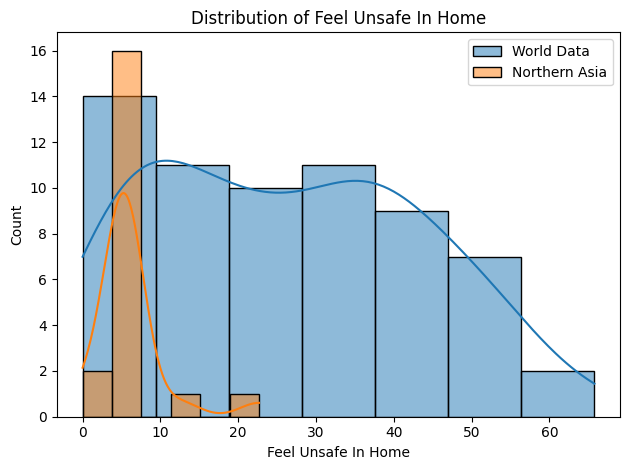

In [30]:
# histogram (full data)
sns.histplot(data = world_df,
          x    = 'Feel Unsafe In Home',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Feel Unsafe In Home',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Feel Unsafe In Home')
plt.legend()
plt.tight_layout()
plt.show()

<br>

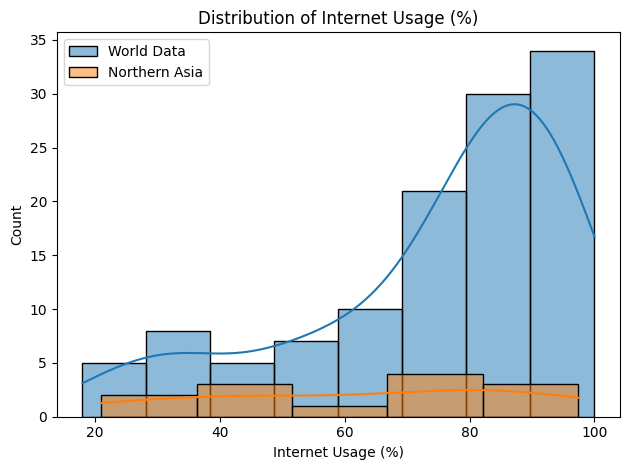

In [31]:
# histogram (full data)
sns.histplot(data = world_df,
          x    = 'Internet Usage (%)',
          kde  = True,
          label = 'World Data')

# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Internet Usage (%)',
          kde  = True,
          label = 'Northern Asia')

# rendering the visual
plt.title(label = 'Distribution of Internet Usage (%)')
plt.legend()
plt.tight_layout()
plt.show()

<br>

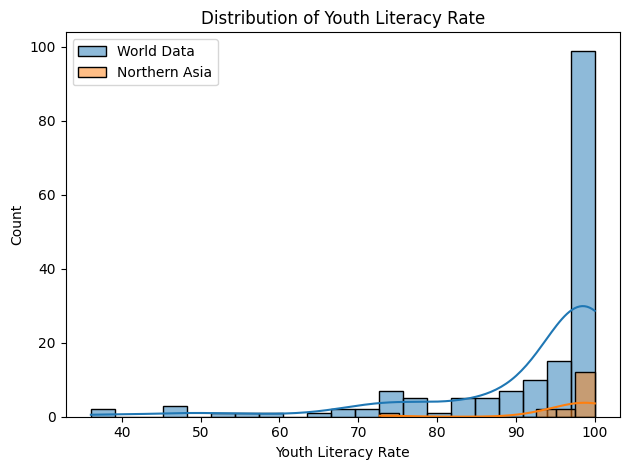

In [32]:
# histogram (full data)
sns.histplot(data = world_df,
          x     = 'Youth Literacy Rate',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Youth Literacy Rate',
          kde  = True,
          label = 'Northern Asia')

# rendering the visual
plt.title(label = 'Distribution of Youth Literacy Rate')
plt.legend()
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Missing Value Imputation</h3><br>
Develop and code an imputation strategy for each of your chosen features. Remember, missing value imputation should minimally impact a feature's original distribution. Below are the available strategies:

* Impute using a <strong>global</strong> (full dataset) descriptive statistic (mean, min, max, etc.).
* Impute using a <strong>local</strong> (your Hult region) descriptive statistic (mean, min, max, etc.).
* Drop the feature from the full dataset.

Below is the help documentation for two methods that can be used to address this challenge.

In [ ]:
# documentation for the .fillna() method
help(pd.DataFrame.fillna)

Help on function fillna in module pandas.core.generic:

fillna(self, value: 'Hashable | Mapping | Series | DataFrame | None' = None, *, method: 'FillnaOptions | None' = None, axis: 'Axis | None' = None, inplace: 'bool_t' = False, limit: 'int | None' = None, downcast: 'dict | None | lib.NoDefault' = <no_default>) -> 'Self | None'
    Fill NA/NaN values using the specified method.

    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series:

        * ffill: propagate last valid observation forward to next valid.
        * backfill / bfill: use next va

<br>

In [ ]:
# documentation for the .drop() method
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels: 'IndexLabel | None' = None, *, axis: 'Axis' = 0, index: 'IndexLabel | None' = None, columns: 'IndexLabel | None' = None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None'
    Drop specified labels from rows or columns.

    Remove rows or columns by specifying label names and corresponding
    axis, or by directly specifying index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the :ref:`user guide <advanced.shown_levels>`
    for more information about the now unused levels.

    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>a)</strong> What is your strategy for the feature in the <strong>mv_hi</strong> group? (minimum of two sentences)

Since the feature "Feel Unsafe In Home" is right-skewed and the mean is getting pulled toward extremes, we are going to impute the median value of the feature column. Additionaly the feature has 65% missing values, the median value will avoid excessive bias.

In [26]:
## code Step 4a here ##
# Step 4a: Feel Unsafe In Home

feature_hi = "Feel Unsafe In Home"

# local median (Northern Asia)
hi_median_local = team6[feature_hi].median()

# imputing Internet Usage (%)
team6[feature_hi].fillna(value   = hi_median_local,
                           inplace = True)

# quick check
print(f"Median used: {hi_median_local:.4f}")
print("Remaining missing values:", team6[feature_hi].isna().sum())

Median used: 5.3652
Remaining missing values: 0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>b)</strong> What is your strategy for the feature in the <strong>mv_mid</strong> group? (minimum of two sentences)

We used the Median Simple Imputation method to replace the missing values in Internet Usage since the feature Histogram was left Skewed, resulting in zero remaining missing observations.

In [33]:
# Step 4b: Internet Usage (%)

feature_hi = "Internet Usage (%)"

# local median (Northern Asia)
hi_median_local = team6[feature_hi].median()

# imputing Internet Usage (%)
team6[feature_hi].fillna(value   = hi_median_local,
                           inplace = True)

# quick check
print(f"Median used: {hi_median_local:.4f}")
print("Remaining missing values:", team6[feature_hi].isna().sum())

Median used: 75.6113
Remaining missing values: 0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>c)</strong> What is your strategy for the feature in the <strong>mv_low</strong> group? (minimum of two sentences)

Missing values in Youth Literacy Rate were replaced using the local median imputation, resulting in zero remaining missing values. This preserves the feature’s distribution while reflecting the high Youth Literacy rate typical of Northern Asia. We used the local region values since the factors affecting glogal Youth Literacy differ with context.

In [ ]:
## code Step 4c here ##
# Step 4c: Youth Literacy Rate

feature_hi = "Youth Literacy Rate"

# local median (Northern Asia)
hi_median_local = team6[feature_hi].median()

# imputing Internet Usage (%)
team6[feature_hi].fillna(value   = hi_median_local,
                           inplace = True)

# quick check
print(f"Median used: {hi_median_local:.4f}")
print("Remaining missing values:", team6[feature_hi].isna().sum())


Median used: 98.8712
Remaining missing values: 0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 5: Checking Results</h3><br>
After imputing, complete and run the histogram codes below to ensure the original distribution of each feature was not severely impacted. Note that you may get an error if you dropped any of your chosen features from the dataset (this will not impact your grade).

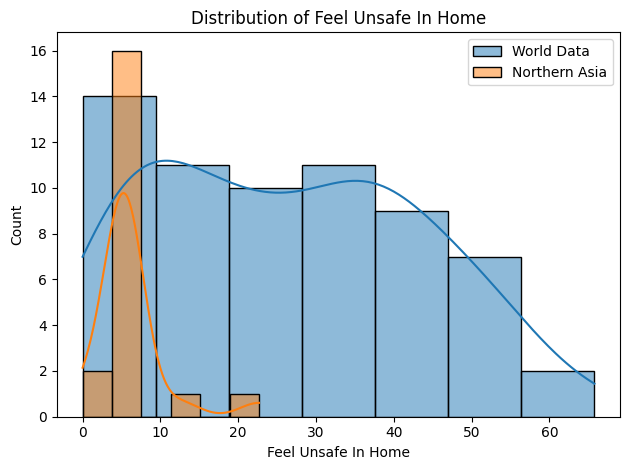

In [34]:
## feature from the mv_hi group ##
sns.histplot(data = world_df,
          x    = 'Feel Unsafe In Home',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Feel Unsafe In Home',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Feel Unsafe In Home')
plt.legend()
plt.tight_layout()
plt.show()

<br>

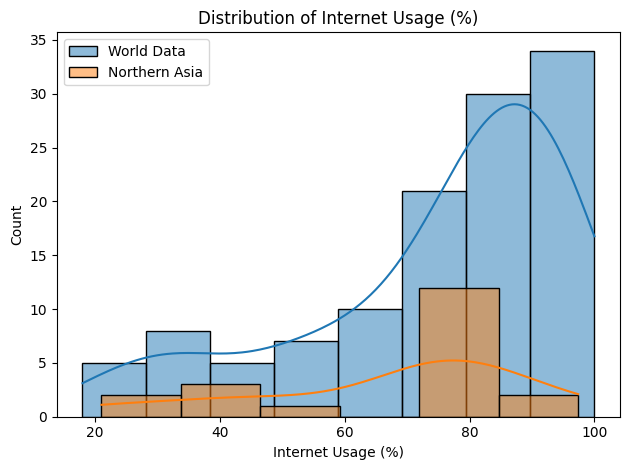

In [35]:
## feature from the mv_mid group ##

sns.histplot(data = world_df,
          x    = 'Internet Usage (%)',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Internet Usage (%)',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Internet Usage (%)')
plt.legend()
plt.tight_layout()
plt.show()

<br>

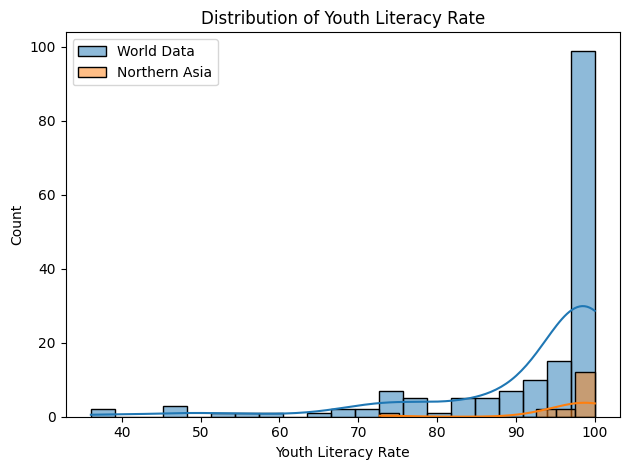

In [36]:
## feature from the mv_low group ##
sns.histplot(data = world_df,
          x    = 'Youth Literacy Rate',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Youth Literacy Rate',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Youth Literacy Rate')
plt.legend()
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 5: Advanced Imputation</h3><br>
Complete the code below by inputting your Hult region and your chosen features that. Then, run the following codes to implement a KNN imputer. This is an algorithm we will discuss later in our program. For now, note that KNN makes predictions based on similarities from other observations (rows).
<br><br>
Note: Features with 100% missing values will not work in the code below.

In [37]:
# new methods from sklearn!
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# reimporting the data
world_df = pd.read_excel(io = "./worldbank.xlsx")


# subesetting Hult region
team6 = world_df[ world_df["Region"] == 'Northern Asia']


# selecting features
features = ['Feel Unsafe In Home',
            'Internet Usage (%)',
            'Youth Literacy Rate']

<br>

In [38]:
## Scaling and Imputing (advanced)

# scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X = team6[features])


# imputing with KNN
imputer = KNNImputer(n_neighbors = 5)
imputed_scaled_data = imputer.fit_transform(scaled_data)


# reversing the scaling
imputed_data = scaler.inverse_transform(imputed_scaled_data)

# attaching results to team_df
team6[features] = imputed_data

team6[features]

,Feel Unsafe In Home,Internet Usage (%),Youth Literacy Rate
15,1.263600e+01,38.917400,94.461800
22,3.468324e+00,54.450060,98.000000
40,4.665644e+00,75.611300,99.810000
85,7.520903e+00,62.578408,96.870076
88,5.727666e+00,46.310000,96.535900
97,9.731718e+00,82.914100,99.716840
103,5.365200e+00,77.920400,99.700000
113,3.987730e+00,71.236400,99.790000
116,4.665644e+00,97.398600,95.563900
117,-8.881784e-16,75.086040,99.430000


<br>

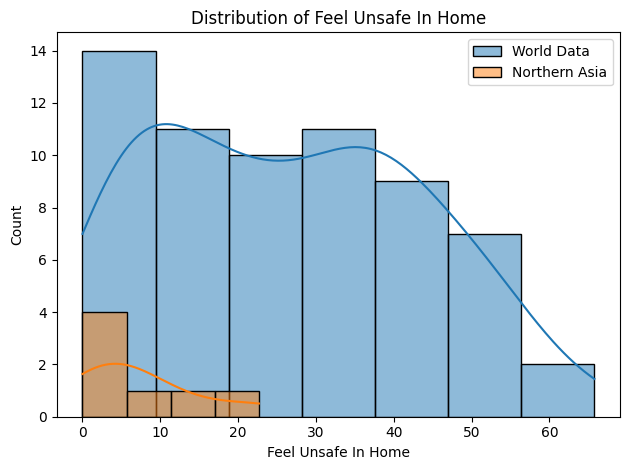

In [52]:
## feature from the mv_hi group ##
sns.histplot(data = world_df,
          x    = 'Feel Unsafe In Home',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Feel Unsafe In Home',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Feel Unsafe In Home')
plt.legend()
plt.tight_layout()
plt.show()

<br>

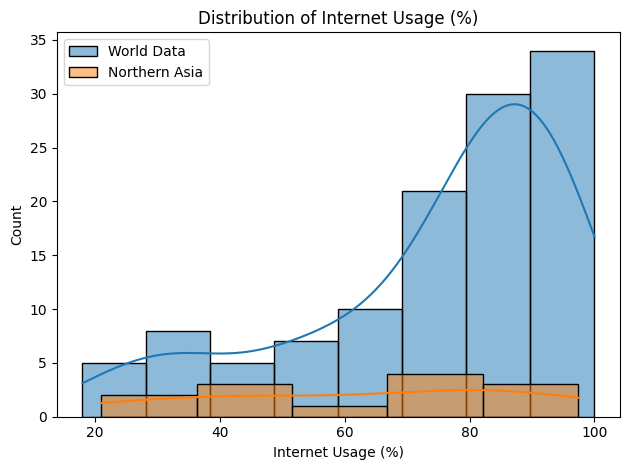

In [49]:
## feature from the mv_mid group ##
sns.histplot(data = world_df,
          x    = 'Internet Usage (%)',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Internet Usage (%)',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Internet Usage (%)')
plt.legend()
plt.tight_layout()
plt.show()

<br>

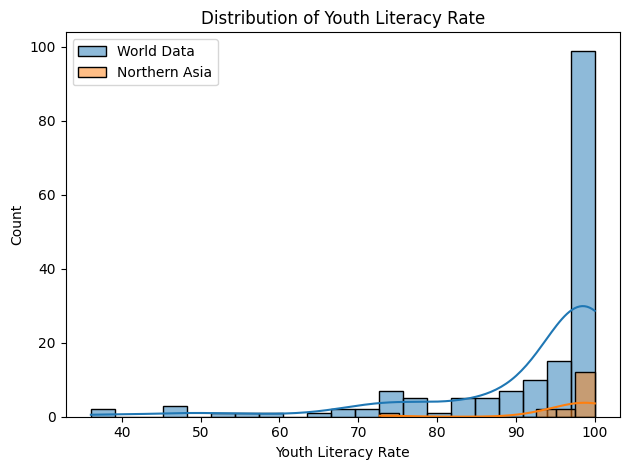

In [50]:
## feature from the mv_low group ##
sns.histplot(data = world_df,
          x    = 'Youth Literacy Rate',
          kde  = True,
          label = 'World Data')


# histogram (team's region)
sns.histplot(data = team6,
          x    = 'Youth Literacy Rate',
          kde  = True,
          label = 'Northern Asia')


# rendering the visual
plt.title(label = 'Distribution of Youth Literacy Rate')
plt.legend()
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 6: Reflection</h3><br>
Each imputation strategy has its advantages in certain situations.

* We used the Simple Imputation method of using the median on all the 3 classes of our chosen features replacing with local Northen Asia Region descriptive statistic (median) imputation, making it ideal since our region had few missing values. Using the median is particularly useful for right and left skewed data which is not categorical.


* The KNN imputation was used to compare the Simple Imputation and Multivariate Imputation as it leverages the relationships among multiple features to estimate missing values, making it more accurate. The missing values to be filled using patterns and similarities across observations, not just a single summary statistic. The KNN method is useful when preserving multivariate patterns is important, as it reduces bias compared to simple statistical imputation.



* Drop a feature from the dataset.
We only dropped "Data Count", "Code", 'Obs' and 'Region', no features were dropped.

CHAT GPT Codes Used:

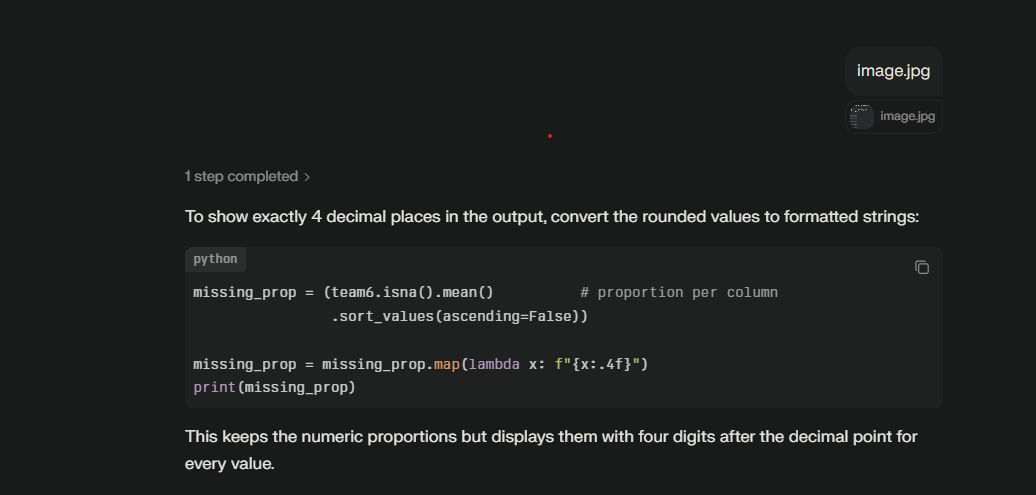

In [57]:
from IPython.display import Image
Image(filename='/content/4DP.png')

<br>